# New Section

In [ ]:
import os
import random
from shutil import copy
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path ke dataset di Google Drive
DATASET_DIR = '/content/drive/MyDrive/DATASET/ASIA'
categories = ['Down Syndrome', 'Healthy']

# Inisialisasi total gambar
total_images = 0

print("Renaming Results:")
print("=================")

for category in categories:
    category_dir = os.path.join(DATASET_DIR, category)
    if os.path.isdir(category_dir):
        count = 0  # Counter untuk setiap kategori
        for idx, filename in enumerate(os.listdir(category_dir), start=1):
            old_path = os.path.join(category_dir, filename)
            if os.path.isfile(old_path):
                # Buat nama baru
                new_filename = f"{category.replace(' ', '_')}_{idx:03}.jpg"  # Ganti spasi dengan underscore
                new_path = os.path.join(category_dir, new_filename)
                os.rename(old_path, new_path)
                count += 1
                print(f"{filename} -> {new_filename}")
        print(f"\nJumlah gambar di kategori '{category}': {count}")
        total_images += count

print("\n=================")
print(f"Total gambar di dataset: {total_images}")

Renaming Results:
down_1005_jpg.rf.c17f750685ba5cfea73dc058a367edad.jpg -> Down_Syndrome_001.jpg
down_1008_jpg.rf.315e6e56a1f05562ee70703880c39b71.jpg -> Down_Syndrome_002.jpg
down_1007_jpg.rf.40bb1cba224172669a417fa349b95ac8.jpg -> Down_Syndrome_003.jpg
down_1004_jpg.rf.49b05473862427c71a433d70574561e0.jpg -> Down_Syndrome_004.jpg
down_1010_jpg.rf.323af843c2078ee6e56bed36f8ba08a8.jpg -> Down_Syndrome_005.jpg
down_1009_jpg.rf.a9fdf45ab35209df6e85b17af19bb4da.jpg -> Down_Syndrome_006.jpg
down_101_jpg.rf.24055da8950fd9910f5c68927d1746ed.jpg -> Down_Syndrome_007.jpg
down_1018_jpg.rf.dc8da05bb734efa9f7d0e34c91f1ef6f.jpg -> Down_Syndrome_008.jpg
down_1013_jpg.rf.122a12d29b934582b4b44cb56ae9fd8d.jpg -> Down_Syndrome_009.jpg
down_1021_jpg.rf.ae69ae115e093b19efa0fc3f946f5966.jpg -> Down_Syndrome_010.jpg
down_1017_jpg.rf.edce7e2746cf56b66c1e46b8ad267023.jpg -> Down_Syndrome_011.jpg
down_1012_jpg.rf.32d0537b07941c9076657eb085bd1900.jpg -> Down_Syndrome_012.jpg
down_1026_jpg.rf.afaa152a18054bf700

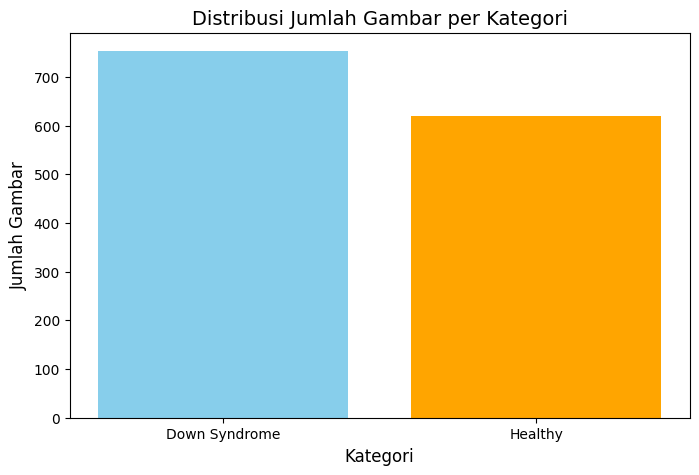

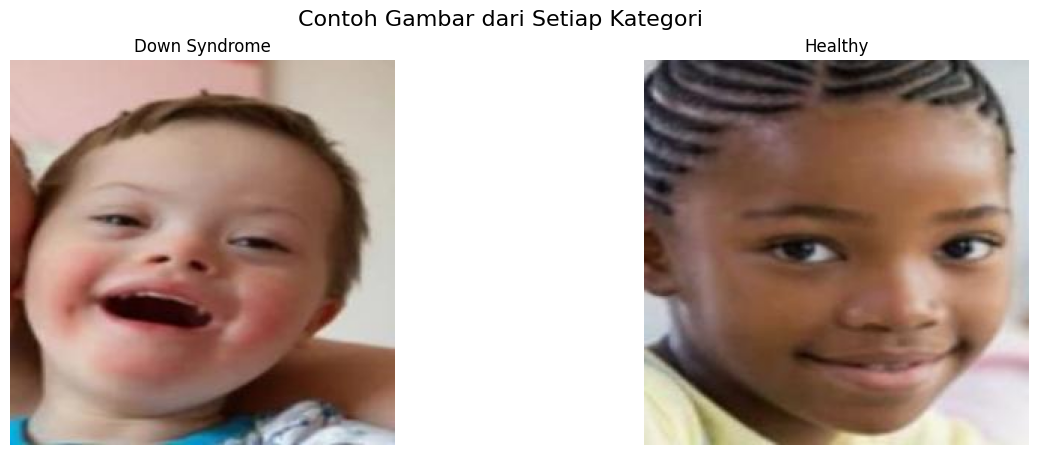

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Menghitung jumlah gambar di setiap kategori
category_counts = {}
for category in categories:
    category_dir = os.path.join(DATASET_DIR, category)
    if os.path.isdir(category_dir):
        count = len([file for file in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, file))])
        category_counts[category] = count

# 1. Visualisasi Distribusi Jumlah Gambar per Kategori
plt.figure(figsize=(8, 5))
plt.bar(category_counts.keys(), category_counts.values(), color=['skyblue', 'orange'])
plt.title('Distribusi Jumlah Gambar per Kategori', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Gambar', fontsize=12)
plt.show()

# 2. Menampilkan Contoh Gambar dari Setiap Kategori
fig, axs = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    category_dir = os.path.join(DATASET_DIR, category)
    example_images = random.sample(os.listdir(category_dir), 3)  # Pilih 3 gambar acak
    axs[i].set_title(category)
    axs[i].imshow(mpimg.imread(os.path.join(category_dir, example_images[0])))
    axs[i].axis('off')

plt.suptitle('Contoh Gambar dari Setiap Kategori', fontsize=16)
plt.show()

In [ ]:
import os
import shutil
import random

# Path asal dan tujuan
data_dir = "/content/drive/MyDrive/DATASET/ASIA"
test_dir = os.path.join(data_dir, "test_data")

# Bikin folder test_data jika belum ada
os.makedirs(test_dir, exist_ok=True)

# Loop tiap kategori (Down Syndrome & Healthy)
for category in ["Down Syndrome", "Healthy"]:
    category_path = os.path.join(data_dir, category)
    test_category_path = os.path.join(test_dir, category)

    # Bikin folder test_data untuk kategori ini
    os.makedirs(test_category_path, exist_ok=True)

    # Ambil semua gambar
    images = [img for img in os.listdir(category_path) if img.endswith(('.jpg', '.png'))]
    test_size = int(len(images) * 0.1)  # 10% buat test

    # Pilih gambar secara random untuk test
    test_images = random.sample(images, test_size)

    # Pindahin gambar ke test_data
    for img in test_images:
        shutil.move(os.path.join(category_path, img), os.path.join(test_category_path, img))

print("✅ Test data berhasil dipindahkan!")

✅ Test data berhasil dipindahkan!


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import os

# Path ke dataset utama
data_dir = '/content/drive/MyDrive/DATASET/ASIA'
test_dir = '/content/drive/MyDrive/DATASET/test_data'  # Test set tetap dipisah

# Ambil daftar gambar dan labelnya
image_paths = []
labels = []
categories = ['Down Syndrome', 'Healthy']

for label, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('.jpg', '.png'))]
    image_paths.extend(images)
    labels.extend([label] * len(images))

# Buat DataFrame
df = pd.DataFrame({'filename': image_paths, 'label': labels})

# Ubah label ke string agar cocok dengan class_mode='categorical'
df['label'] = df['label'].astype(str)

# Set up k-fold cross-validation (5 fold)
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# ImageDataGenerator tanpa augmentasi
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Test generator (konstan)
test_generator = val_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

# Menyimpan hasil setiap fold
fold_accuracies = []
fold_losses = []
fold_histories = []

# Start k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kfolds.split(df)):
    print(f"\nTraining on fold {fold + 1}...")

    # Buat subset train & val dari DataFrame df
    train_df = df.iloc[train_idx].reset_index(drop=True)
    val_df = df.iloc[val_idx].reset_index(drop=True)

    # Training generator (tanpa augmentasi)
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='filename',
        y_col='label',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32,
        shuffle=True
    )

    # Validation generator (tanpa augmentasi)
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='filename',
        y_col='label',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    # Model VGG19
    model = Sequential()
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers[:-5]:
        layer.trainable = False
    model.add(base_model)

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_vgg19_fold_{fold + 1}.keras', monitor='val_accuracy', save_best_only=True)

    history = model.fit(train_generator, validation_data=val_generator, epochs=15, callbacks=[early_stopping, model_checkpoint])

    fold_accuracies.append(max(history.history['val_accuracy']))
    fold_losses.append(min(history.history['val_loss']))
    fold_histories.append(history)

    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test accuracy for fold {fold + 1}: {test_acc}")

# Output fold accuracies dan mean accuracy
print("\n=== Hasil K-Fold Cross-Validation ===")
for i, (acc, loss) in enumerate(zip(fold_accuracies, fold_losses)):
    print(f"Fold {i+1}: Accuracy = {acc:.4f}, Loss = {loss:.4f}")

# Rata-rata akurasi & loss
print(f"\nMean Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Mean Loss: {np.mean(fold_losses):.4f}")

Found 136 images belonging to 2 classes.

Training on fold 1...
Found 988 validated image filenames belonging to 2 classes.
Found 248 validated image filenames belonging to 2 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 214s 6s/step - accuracy: 0.5301 - loss: 0.8062 - val_accuracy: 0.7661 - val_loss: 0.4959
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - accuracy: 0.7575 - loss: 0.5147 - val_accuracy: 0.8387 - val_loss: 0.4142
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.8284 - loss: 0.4108 - val_accuracy: 0.8387 - val_loss: 0.3327
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - accuracy: 0.8891 - loss: 0.2761 - val_accuracy: 0.8427 - val_loss: 0.3899
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.8669 - loss: 0.2883 - val_accuracy: 0.7944 - val_loss: 0.5168
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.9374 - loss: 0.1594 - val_accuracy: 0.8710 - val_loss: 0.4349
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - accuracy: 0.9443 - loss: 0.1569 - val_accuracy: 0.8710 - val_loss: 0.3948
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - accuracy: 0.9736 - loss: 0.0831 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5838 - loss: 0.7575 - val_accuracy: 0.7530 - val_loss: 0.5292
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 48s 355ms/step - accuracy: 0.6994 - loss: 0.5539 - val_accuracy: 0.7895 - val_loss: 0.4311
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - accuracy: 0.8122 - loss: 0.4131 - val_accuracy: 0.8016 - val_loss: 0.4124
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.8487 - loss: 0.3539 - val_accuracy: 0.8178 - val_loss: 0.3948
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 341ms/step - accuracy: 0.9037 - loss: 0.2827 - val_accuracy: 0.8826 - val_loss: 0.3073
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.9417 - loss: 0.1693 - val_accuracy: 0.9028 - val_loss: 0.2931
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.9698 - loss: 0.0977 - val_accuracy: 0.8866 - val_loss: 0.3238
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 309ms/step - accuracy: 0.9613 - loss: 0.1132 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 450ms/step - accuracy: 0.5143 - loss: 0.8397 - val_accuracy: 0.7895 - val_loss: 0.5360
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 343ms/step - accuracy: 0.6982 - loss: 0.5726 - val_accuracy: 0.8340 - val_loss: 0.3920
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.7938 - loss: 0.4423 - val_accuracy: 0.8300 - val_loss: 0.3509
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 337ms/step - accuracy: 0.8454 - loss: 0.3513 - val_accuracy: 0.8785 - val_loss: 0.3049
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.8686 - loss: 0.3013 - val_accuracy: 0.8016 - val_loss: 0.4454
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 340ms/step - accuracy: 0.8952 - loss: 0.2693 - val_accuracy: 0.8907 - val_loss: 0.2771
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 309ms/step - accuracy: 0.9180 - loss: 0.2227 - val_accuracy: 0.8866 - val_loss: 0.3183
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step - accuracy: 0.9728 - loss: 0.0875 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 451ms/step - accuracy: 0.5384 - loss: 0.8101 - val_accuracy: 0.7571 - val_loss: 0.6228
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.6666 - loss: 0.6287 - val_accuracy: 0.7247 - val_loss: 0.5585
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - accuracy: 0.7436 - loss: 0.5318 - val_accuracy: 0.7976 - val_loss: 0.4433
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.7767 - loss: 0.4614 - val_accuracy: 0.7854 - val_loss: 0.4980
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 338ms/step - accuracy: 0.8351 - loss: 0.3872 - val_accuracy: 0.8219 - val_loss: 0.3702
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.8682 - loss: 0.3407 - val_accuracy: 0.7935 - val_loss: 0.5537
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.8998 - loss: 0.2584 - val_accuracy: 0.8785 - val_loss: 0.3806
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.9563 - loss: 0.1407 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - accuracy: 0.5286 - loss: 0.8726 - val_accuracy: 0.5547 - val_loss: 0.6557
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 374ms/step - accuracy: 0.6652 - loss: 0.6323 - val_accuracy: 0.6154 - val_loss: 0.6449
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.7071 - loss: 0.5717 - val_accuracy: 0.8097 - val_loss: 0.4029
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 315ms/step - accuracy: 0.7768 - loss: 0.4308 - val_accuracy: 0.8016 - val_loss: 0.3945
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.8511 - loss: 0.3830 - val_accuracy: 0.8623 - val_loss: 0.2829
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.8942 - loss: 0.2654 - val_accuracy: 0.8583 - val_loss: 0.2584
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 340ms/step - accuracy: 0.9285 - loss: 0.1727 - val_accuracy: 0.8745 - val_loss: 0.3876
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step - accuracy: 0.9375 - loss: 0.1512 - val_accu

Fold terbaik adalah Fold 1 dengan akurasi 0.9194


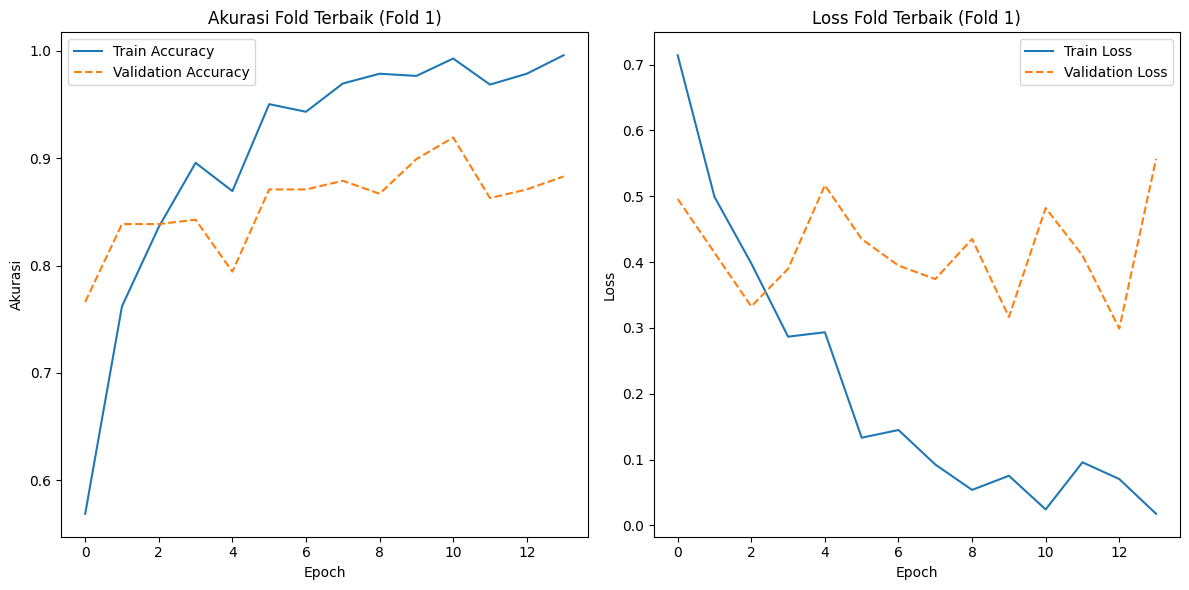

Akurasi terbaik pada fold 1: 0.9194
Loss terbaik pada fold 1: 0.2991


In [ ]:
# Pilih fold terbaik berdasarkan validasi akurasi maksimum
best_fold_index = np.argmax(fold_accuracies)  # Index fold terbaik
print(f"Fold terbaik adalah Fold {best_fold_index + 1} dengan akurasi {fold_accuracies[best_fold_index]:.4f}")

# Ambil history fold terbaik
best_history = fold_histories[best_fold_index]

# Grafik Akurasi untuk fold terbaik
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title(f'Akurasi Fold Terbaik (Fold {best_fold_index + 1})')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss untuk fold terbaik
plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title(f'Loss Fold Terbaik (Fold {best_fold_index + 1})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Tampilkan akurasi dan loss untuk fold terbaik
print(f"Akurasi terbaik pada fold {best_fold_index + 1}: {fold_accuracies[best_fold_index]:.4f}")
print(f"Loss terbaik pada fold {best_fold_index + 1}: {fold_losses[best_fold_index]:.4f}")

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np

# Pilih fold terbaik berdasarkan validasi akurasi maksimum
best_fold_index = np.argmax(fold_accuracies)  # Index fold terbaik
print(f"Fold terbaik adalah Fold {best_fold_index + 1} dengan akurasi {fold_accuracies[best_fold_index]:.4f}")

# Load model terbaik dari fold terbaik
best_model_path = f'best_vgg19_fold_{best_fold_index + 1}.keras'
best_model = tf.keras.models.load_model(best_model_path)

# Test generator untuk fold terbaik (Gunakan ImageDataGenerator baru, tanpa validation_split)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',  # Harus 'categorical' karena model pakai softmax
    batch_size=32,
    shuffle=False  # Jangan di-shuffle supaya urutan gambar tetap
)

# Dapatkan prediksi untuk fold terbaik
predictions = best_model.predict(test_generator)

# Konversi hasil softmax menjadi label kelas
y_pred = np.argmax(predictions, axis=1)  # Pilih kelas dengan probabilitas tertinggi

# Ambil label asli (y_true) dari generator
y_true = test_generator.classes  # Label asli dari test set

# Class labels untuk laporan
class_labels = list(test_generator.class_indices.keys())

# Generate classification report untuk fold terbaik
report = classification_report(y_true, y_pred, target_names=class_labels)

# Tampilkan laporan
print("Classification Report for Best Fold:")
print(report)

# (Optional) Simpan laporan ke file
# with open(f'classification_report_fold_{best_fold_index + 1}.txt', 'w') as f:
#     f.write(report)

Fold terbaik adalah Fold 1 dengan akurasi 0.9194
Found 136 images belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step
Classification Report for Best Fold:
               precision    recall  f1-score   support

Down Syndrome       0.93      0.87      0.90        75
      Healthy       0.85      0.92      0.88        61

     accuracy                           0.89       136
    macro avg       0.89      0.89      0.89       136
 weighted avg       0.89      0.89      0.89       136



Fold terbaik adalah Fold 1 dengan akurasi 0.9194
Found 136 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step


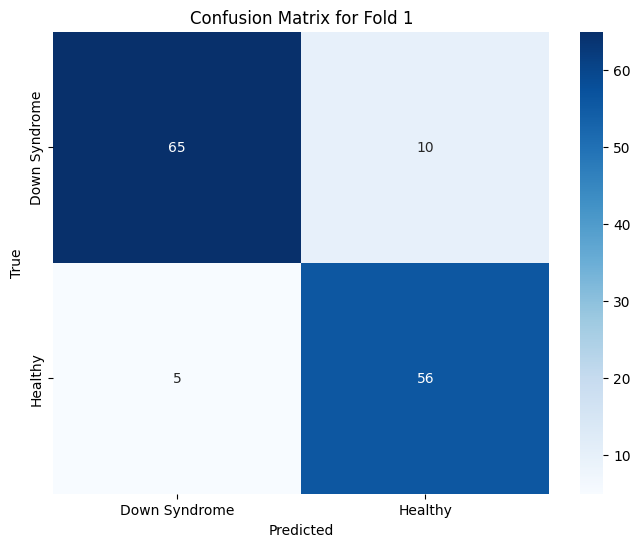

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pilih fold terbaik berdasarkan validasi akurasi maksimum
best_fold_index = np.argmax(fold_accuracies)  # Index fold terbaik
print(f"Fold terbaik adalah Fold {best_fold_index + 1} dengan akurasi {fold_accuracies[best_fold_index]:.4f}")

# Load model terbaik dari fold terbaik
best_model_path = f'best_vgg19_fold_{best_fold_index + 1}.keras'
best_model = tf.keras.models.load_model(best_model_path)

# Test generator untuk fold terbaik (tanpa validation_split)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',  # Sesuai dengan softmax output
    batch_size=32,
    shuffle=False  # Jangan di-shuffle supaya urutan gambar tetap
)

# Dapatkan prediksi untuk fold terbaik
predictions = best_model.predict(test_generator)

# Konversi hasil softmax menjadi label kelas
y_pred = np.argmax(predictions, axis=1)  # Pilih kelas dengan probabilitas tertinggi

# Ambil label asli (y_true) dari generator
y_true = test_generator.classes  # Label asli dari test set

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title(f"Confusion Matrix for Fold {best_fold_index + 1}")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Jumlah DS diprediksi sebagai Healthy: 10
Jumlah Healthy diprediksi sebagai DS: 5


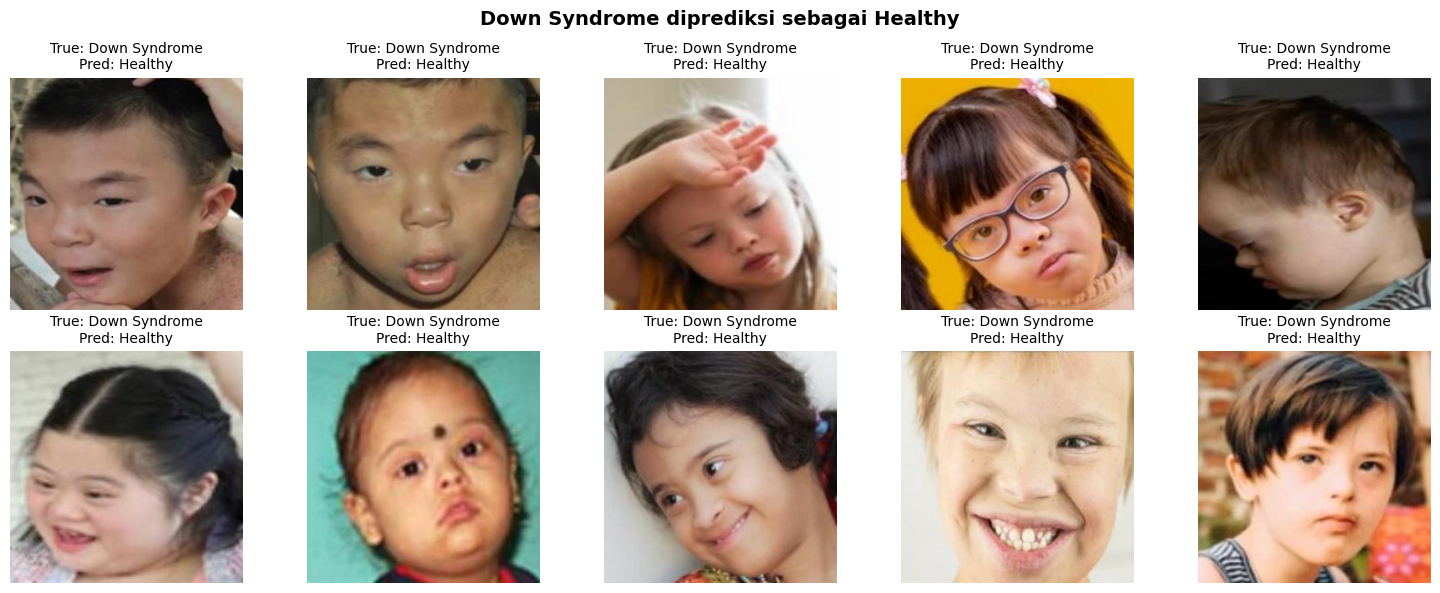

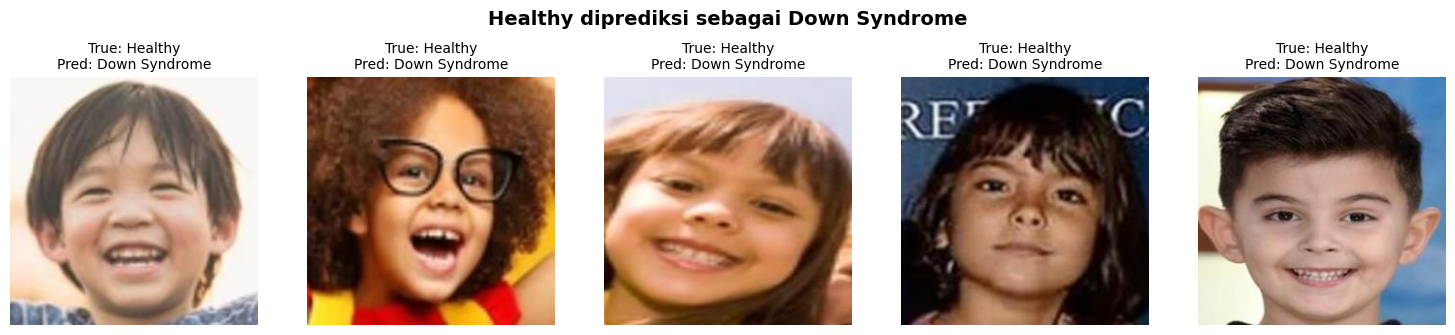

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ambil daftar label kelas dari test generator
class_labels = list(test_generator.class_indices.keys())

# Indeks kesalahan prediksi
misclassified_indices = np.where(y_pred != y_true)[0]

# Filter berdasarkan jenis kesalahan
ds_as_healthy = [idx for idx in misclassified_indices if y_true[idx] == 0 and y_pred[idx] == 1]  # DS → Healthy
healthy_as_ds = [idx for idx in misclassified_indices if y_true[idx] == 1 and y_pred[idx] == 0]  # Healthy → DS

print(f"Jumlah DS diprediksi sebagai Healthy: {len(ds_as_healthy)}")
print(f"Jumlah Healthy diprediksi sebagai DS: {len(healthy_as_ds)}")

# Fungsi untuk menampilkan gambar
def plot_misclassified_images(indices, title, rows=2, cols=5):
    plt.figure(figsize=(cols * 3, rows * 3))
    for i, idx in enumerate(indices[:rows * cols]):  # Batasi agar grid tidak terlalu besar
        img_path = test_generator.filepaths[idx]
        img = Image.open(img_path)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        true_label = class_labels[y_true[idx]]
        pred_label = class_labels[y_pred[idx]]
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
        plt.axis('off')

    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Tampilkan kesalahan prediksi DS → Healthy
if ds_as_healthy:
    plot_misclassified_images(ds_as_healthy, "Down Syndrome diprediksi sebagai Healthy")

# Tampilkan kesalahan prediksi Healthy → DS
if healthy_as_ds:
    plot_misclassified_images(healthy_as_ds, "Healthy diprediksi sebagai Down Syndrome")

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,562,184 (185.25 MB)

 Trainable params: 12,659,010 (48.29 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

 Optimizer params: 25,318,022 (96.58 MB)